In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("bank_marketing_part1_Data.csv")

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.shape

(210, 7)

In [5]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

In [6]:
desc_stat=df.describe().T

In [7]:
desc_stat

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [8]:
desc_stat.to_excel("abc.xlsx")

In [9]:
df.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

In [10]:
import matplotlib.pyplot as plt

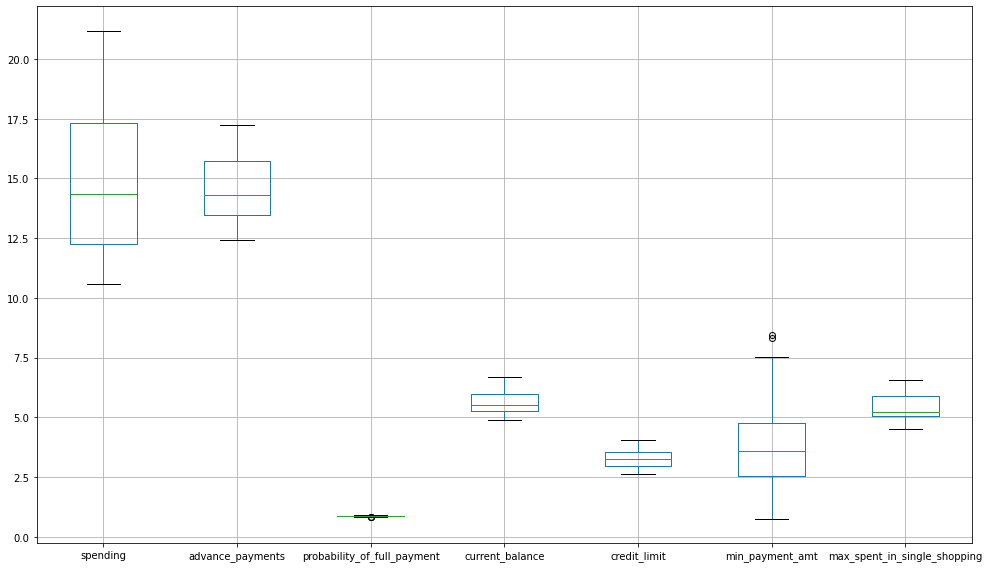

In [11]:
fig=plt.figure(figsize=(14,8))
ax=fig.gca()
df.boxplot(ax=ax)
plt.tight_layout()

In [12]:
import warnings
warnings.filterwarnings("ignore")

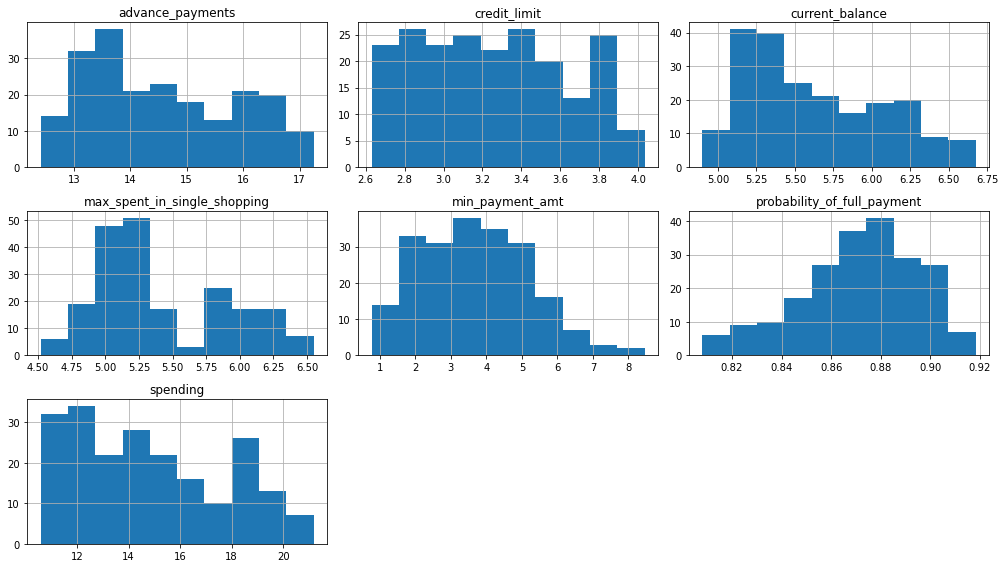

In [13]:
fig2=plt.figure(figsize=(14,8))
ax=fig2.gca()
df.hist(ax=ax)
plt.tight_layout()

In [14]:
s=df.isnull().sum()

In [15]:
r=pd.DataFrame(data=s,index=df.columns,columns=["No. of null values"])

In [16]:
r.to_excel("abc1.xlsx")

In [17]:
def number_of_outliers(df):
    IQR = df.quantile(0.75) - df.quantile(0.25)
    Number = ((df > (df.quantile(0.75)+(1.5*IQR))) | (df < (df.quantile(0.25)-(1.5*IQR)))).sum()
    dataframe = pd.DataFrame({"Number of Outliers":Number})
    return dataframe

In [18]:
e=number_of_outliers(df)

In [19]:
e

,Number of Outliers
spending,0
advance_payments,0
probability_of_full_payment,3
current_balance,0
credit_limit,0
min_payment_amt,2
max_spent_in_single_shopping,0


In [20]:
e.to_excel("abc2.xlsx")

In [21]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [22]:
df[df["probability_of_full_payment"] > 0.9340875]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


In [23]:
df[df["probability_of_full_payment"] < 0.8105875]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
77,12.13,13.73,0.8081,5.394,2.745,4.825,5.220
189,11.75,13.52,0.8082,5.444,2.678,4.378,5.310


In [24]:
import seaborn as sns

In [25]:
sns.set_style("darkgrid")

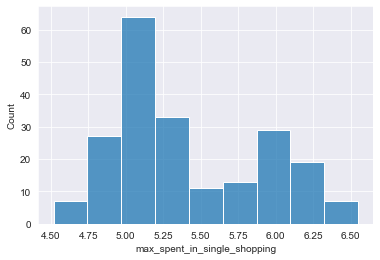

In [26]:
sns.histplot(x="max_spent_in_single_shopping",data=df)

In [27]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

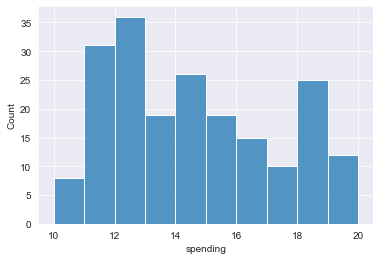

In [28]:
sns.histplot(x='spending',data=df,binwidth=1,binrange=(10,20))

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
ss = StandardScaler()

In [31]:
A1=ss.fit_transform(df)

In [32]:
scaled_df = pd.DataFrame(data=A1,columns=df.columns)

In [33]:
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [34]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

In [35]:
ward_link = linkage(scaled_df,method="ward",metric="euclidean")

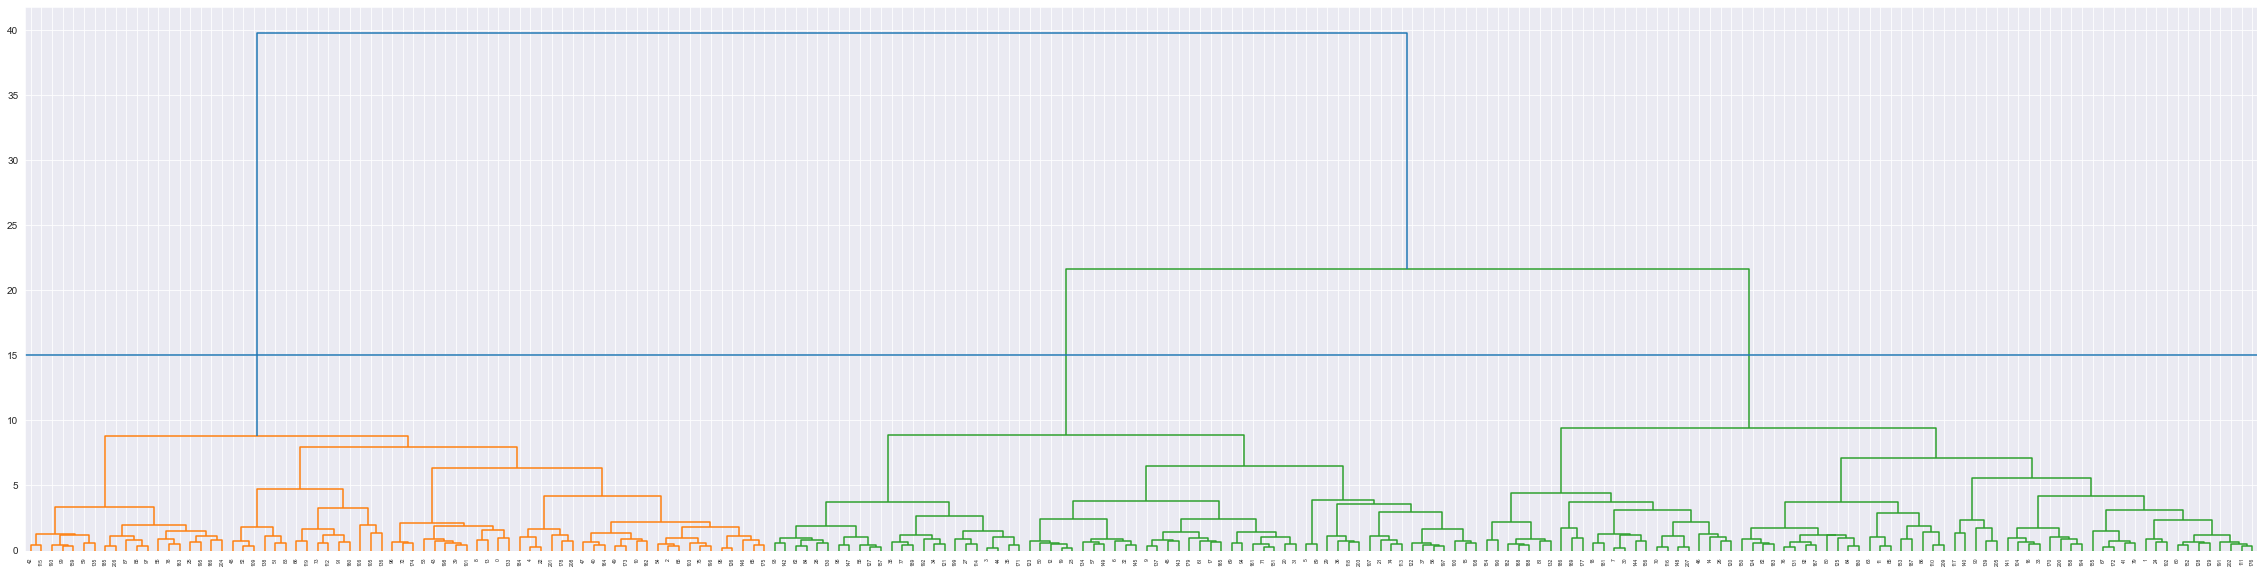

In [36]:
plt.figure(figsize=(40,10))
dend = dendrogram(ward_link)
plt.axhline(y=15)

In [37]:
clusters=fcluster(ward_link,3,criterion="maxclust")

In [38]:
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [39]:
set(clusters)

{1, 2, 3}

In [40]:
df["clusters"]=clusters

In [41]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [76]:
df.groupby("clusters")["current_balance"].min()

clusters
1    5.709
2    4.899
3    4.902
Name: current_balance, dtype: float64

In [42]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping', 'clusters'],
      dtype='object')

In [43]:
Q=df.groupby("clusters")['spending', 'advance_payments', 'probability_of_full_payment','current_balance', 'credit_limit', 'min_payment_amt','max_spent_in_single_shopping'].mean()

In [44]:
Q

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
clusters,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178


In [45]:
Q.to_excel("Cluster profiles.xlsx")

In [46]:
df.groupby("clusters")['spending', 'advance_payments', 'probability_of_full_payment','current_balance', 'credit_limit', 'min_payment_amt','max_spent_in_single_shopping'].min()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
clusters,,,,,,,
1,15.38,14.86,0.8452,5.709,3.268,1.4720,5.443
2,10.59,12.41,0.8081,4.899,2.630,3.0820,4.794
3,11.23,12.63,0.8335,4.902,2.719,0.7651,4.519


In [47]:
w=Q.T

In [48]:
w.to_excel("Cluster profiles.xlsx")

In [49]:
df["clusters"].value_counts()

3    73
1    70
2    67
Name: clusters, dtype: int64

In [50]:
from sklearn.cluster import KMeans

In [51]:
wss=[]
for i in range(1,10):
    KM=KMeans(n_clusters=i,init='k-means++',random_state=20)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

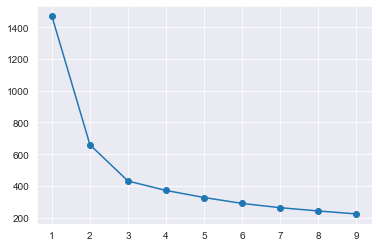

In [52]:
plt.plot(range(1,10),wss,marker="o")

In [53]:
KM1 = KMeans(n_clusters=3,init="k-means++",random_state=20)
KM1.fit(scaled_df)

KMeans(n_clusters=3, random_state=20)

In [54]:
clusters_KM=KM1.labels_

In [55]:
df["Clusters_KM"] = clusters_KM

In [56]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clusters_KM
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


In [57]:
df["Clusters_KM"].value_counts()

0    72
2    71
1    67
Name: Clusters_KM, dtype: int64

In [58]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [59]:
sil_score = silhouette_score(scaled_df,clusters_KM)

In [60]:
sil_score

0.4007270552751299

In [61]:
Sil_Score=[]
for i in range(2,20):
    KM=KMeans(n_clusters=i,init='k-means++',random_state=42)
    KM.fit(scaled_df)
    clusters=KM.labels_
    Sil_Score.append(silhouette_score(scaled_df,clusters))

In [62]:
Sil_Dict = {"Number of clusters":range(2,20),"Silhouette Score":Sil_Score}

In [63]:
df3 = pd.DataFrame(Sil_Dict)
df3

,Number of clusters,Silhouette Score
0,2,0.465772
1,3,0.400727
2,4,0.329197
3,5,0.286505
4,6,0.291278
5,7,0.273939
6,8,0.250225
7,9,0.244914
8,10,0.250275
9,11,0.252753


In [64]:
df3.to_excel("sil.xlsx")

In [65]:
df.groupby("Clusters_KM")['spending', 'advance_payments', 'probability_of_full_payment','current_balance', 'credit_limit', 'min_payment_amt','max_spent_in_single_shopping'].mean()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
Clusters_KM,,,,,,,
0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803


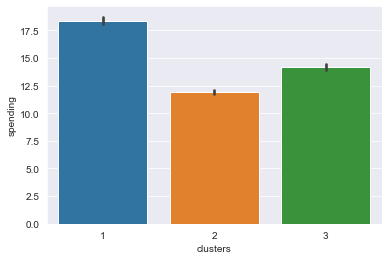

In [66]:
sns.barplot(x="clusters",data=df,y="spending")

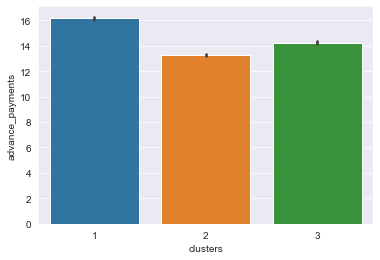

In [67]:
sns.barplot(x="clusters",data=df,y="advance_payments")

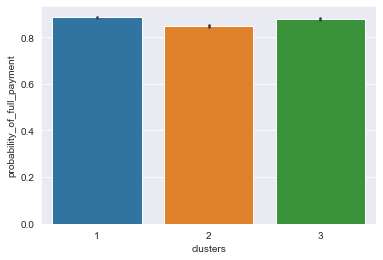

In [68]:
sns.barplot(x="clusters",data=df,y="probability_of_full_payment")

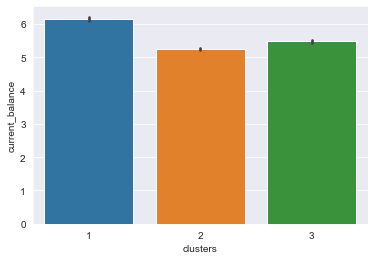

In [69]:
sns.barplot(x="clusters",data=df,y="current_balance")

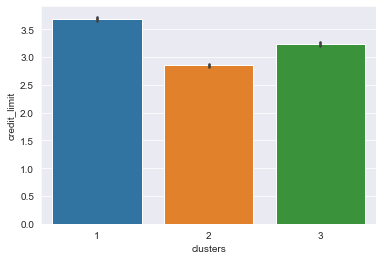

In [70]:
sns.barplot(x="clusters",data=df,y="credit_limit")

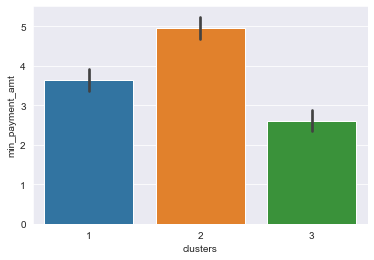

In [71]:
sns.barplot(x="clusters",data=df,y="min_payment_amt")

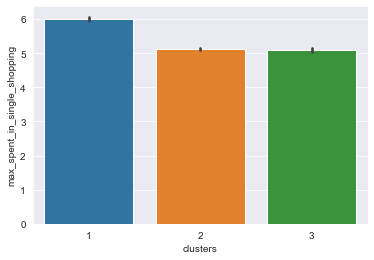

In [72]:
sns.barplot(x="clusters",data=df,y="max_spent_in_single_shopping")

In [73]:
df[df["clusters"]==3]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clusters_KM
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,3,2
11,14.09,14.41,0.8529,5.717,3.186,3.920,5.299,3,2
14,12.10,13.15,0.8793,5.105,2.941,2.201,5.056,3,2
16,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,3,2
...,...,...,...,...,...,...,...,...,...
200,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,3,2
202,14.80,14.52,0.8823,5.656,3.288,3.112,5.309,3,2
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,3,2
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,3,2


In [74]:
centroid=KM1.cluster_centers_

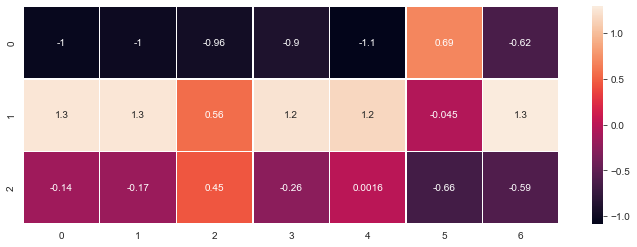

In [75]:
plt.figure(figsize=(12,4))
sns.heatmap(data=centroid,annot=True,linecolor="white",lw=0.5)